### <b> Capstone Project </b>
The work is done by Ilia Semenok

In this project, I will collect reviews from the "Best Buy" website for two popular smartphone models: <b> Samsung </b >and <b> iPhone</b>.<br>

The goal is to analyze customer opinions on specific features of these devices, such as the camera, display and battery life, by performing <br><b> aspect-based sentiment analysis</b> (ABSA). This method will allow to assess how consumers feel about particular aspects of each phone,<br> identifying sentiments as positive, neutral or negative. After conducting the analysis, I will compare the results between the two phone models, <br> providing valuable insights into user preferences and perceptions for each aspect.

#### <b> Web Scraping </b> <br>
Here are the screenshots of the phones I scraped: <br>

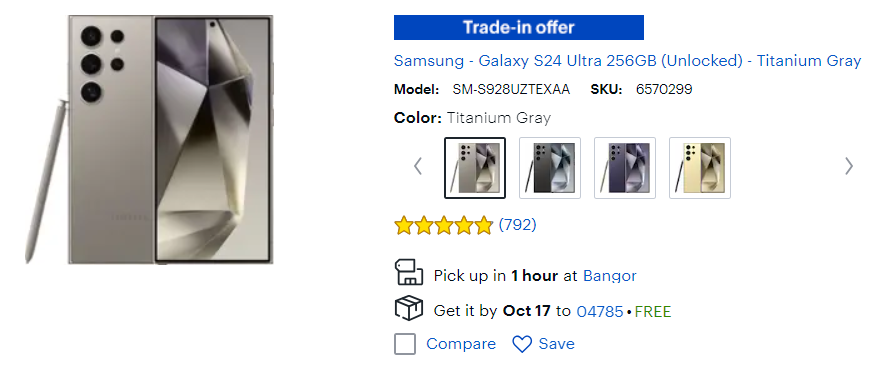 <br>
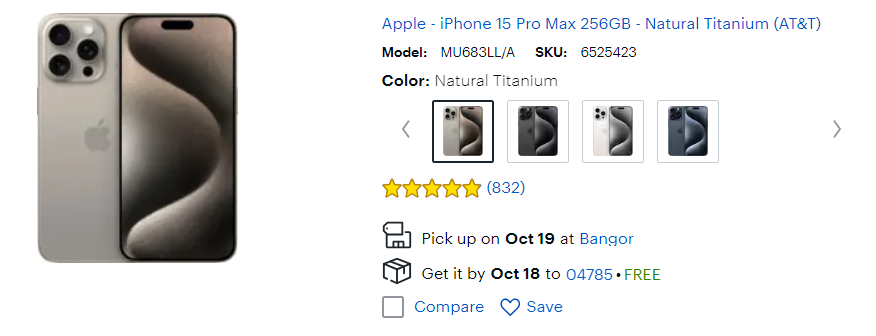

In [1]:
# scraping reviews for samsung phone:
import requests
from bs4 import BeautifulSoup
import time 
import pandas as pd

result = []   # to store the reviews.
more_pages = True
page = 1
while more_pages == True:
    time.sleep(1)
    print(f'Now scraping page {page}')
    url = f"https://www.bestbuy.com/site/reviews/samsung-galaxy-s24-ultra-256gb-unlocked-titanium-black/6569855?variant=A&pageSize=20&sku=6569855&sort=BEST_REVIEW&variant=A&page={page}"
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"}

    response = requests.get(url, headers=headers).text
    soup = BeautifulSoup(response, 'html.parser')
    
    blocks = soup.select('li.review-item')                                      # there is a block of reviews on each page.
    reviews = [block.select_one('p.pre-white-space').text for block in blocks]  # iterating through the block to get all texts from it.

    result.extend(reviews)
    
    if soup.select_one('li.page.next').find('a').get('href'):
        page += 1
    else:
        more_pages = False

Now scraping page 1
Now scraping page 2
Now scraping page 3
Now scraping page 4
Now scraping page 5
Now scraping page 6
Now scraping page 7
Now scraping page 8
Now scraping page 9
Now scraping page 10
Now scraping page 11
Now scraping page 12
Now scraping page 13
Now scraping page 14
Now scraping page 15
Now scraping page 16
Now scraping page 17
Now scraping page 18
Now scraping page 19
Now scraping page 20
Now scraping page 21
Now scraping page 22
Now scraping page 23
Now scraping page 24
Now scraping page 25
Now scraping page 26
Now scraping page 27
Now scraping page 28
Now scraping page 29
Now scraping page 30
Now scraping page 31
Now scraping page 32
Now scraping page 33
Now scraping page 34
Now scraping page 35
Now scraping page 36
Now scraping page 37
Now scraping page 38
Now scraping page 39
Now scraping page 40


In [3]:
df_2 = pd.DataFrame(result, columns=['samsung s24 ultra'])  # converting reviews into a dataframe.
display(df_2.head())
print("The shape:", df_2.shape)

,samsung s24 ultra
0,"I recently upgraded to the Samsung S24 Ultra, ..."
1,Great phone. Works well. My previous device wa...
2,"In an era defined by technological marvels, th..."
3,"So far, I am impressed since changing brand of..."
4,I recently had the opportunity to experience t...


The shape: (792, 1)


In [4]:
# now scraping reviews for iPhone:
# It's the same code but different url.

result = []
more_pages = True
page = 1
while more_pages == True:
    time.sleep(1)
    print(f'Now scraping page {page}')
    url = f"https://www.bestbuy.com/site/reviews/apple-iphone-15-pro-max-256gb-natural-titanium-at-t/6525423?variant=A&page={page}"
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"}

    response = requests.get(url, headers=headers).text
    soup = BeautifulSoup(response, 'html.parser')
    
    blocks = soup.select('li.review-item')
    reviews = [block.select_one('p.pre-white-space').text for block in blocks]

    result.extend(reviews)
    
    if soup.select_one('li.page.next').find('a').get('href'):
        page += 1
    else:
        more_pages = False

Now scraping page 1
Now scraping page 2
Now scraping page 3
Now scraping page 4
Now scraping page 5
Now scraping page 6
Now scraping page 7
Now scraping page 8
Now scraping page 9
Now scraping page 10
Now scraping page 11
Now scraping page 12
Now scraping page 13
Now scraping page 14
Now scraping page 15
Now scraping page 16
Now scraping page 17
Now scraping page 18
Now scraping page 19
Now scraping page 20
Now scraping page 21
Now scraping page 22
Now scraping page 23
Now scraping page 24
Now scraping page 25
Now scraping page 26
Now scraping page 27
Now scraping page 28
Now scraping page 29
Now scraping page 30
Now scraping page 31
Now scraping page 32
Now scraping page 33
Now scraping page 34
Now scraping page 35
Now scraping page 36
Now scraping page 37
Now scraping page 38
Now scraping page 39
Now scraping page 40
Now scraping page 41
Now scraping page 42


In [5]:
df = pd.DataFrame(result, columns=['iphone 15 pro max'])  # converting reviews into a dataframe.
display(df.head())
print("The shape:", df.shape)

,iphone 15 pro max
0,The iPhone 15 Pro Max is a pinnacle of technol...
1,The best iPhone ProMax yet in terms of the dis...
2,I love my new iPhone. The battery life is bett...
3,"excellent, fast, satisfied, nice service\ndefi..."
4,The iPhone 15 Pro Max is the pinnacle of smart...


The shape: (832, 1)


In [6]:
df['samsung s24 ultra'] = df_2['samsung s24 ultra']   # adding iphone reviews to the first dataframe.
df

,iphone 15 pro max,samsung s24 ultra
0,The iPhone 15 Pro Max is a pinnacle of technol...,"I recently upgraded to the Samsung S24 Ultra, ..."
1,The best iPhone ProMax yet in terms of the dis...,Great phone. Works well. My previous device wa...
2,I love my new iPhone. The battery life is bett...,"In an era defined by technological marvels, th..."
3,"excellent, fast, satisfied, nice service\ndefi...","So far, I am impressed since changing brand of..."
4,The iPhone 15 Pro Max is the pinnacle of smart...,I recently had the opportunity to experience t...
...,...,...
827,"Don't buy from them, phone is permanently lock...",NaN
828,How is a phone released on the 22 of September...,NaN
829,Horrible experience I bought a brand new iPhon...,NaN
830,Been over a month still haven’t gotten my phon...,NaN


In [7]:
df.to_csv('reviews_2_smartphones2.csv', index=False)  # saving reviews to a csv file.

In [8]:
df = pd.read_csv('reviews_2_smartphones2.csv')        # loading back the reviews.
print(df.shape)
df.head(3)

(832, 2)


,iphone 15 pro max,samsung s24 ultra
0,The iPhone 15 Pro Max is a pinnacle of technol...,"I recently upgraded to the Samsung S24 Ultra, ..."
1,The best iPhone ProMax yet in terms of the dis...,Great phone. Works well. My previous device wa...
2,I love my new iPhone. The battery life is bett...,"In an era defined by technological marvels, th..."


In [28]:
df.info()  # since there are more reviews of iPhone, some samsung rows are empty.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   iphone 15 pro max  832 non-null    object
 1   samsung s24 ultra  792 non-null    object
dtypes: object(2)
memory usage: 13.1+ KB


Now that we have collected reviews for both Samsung and iPhone we can implement aspect-based sentiment analysis. <br>
#### <b> Aspect-Based Sentiment Analysis </b>
First, we preprocess the reviews. Then we identify if a review has a criterion we're interested in. If it doesn't then we skip this review. <br>
If multiple aspects are mensioned in a review we give sentiment to each aspect in this review. <br>

In [9]:
import re
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# load the pre-trained ABSA model from Hugging Face. and tokenizer. This is an aspect-based sentiment analysis model.
model_name = "yangheng/deberta-v3-base-absa-v1.1"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False, clean_up_tokenization_spaces=False)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# initialize the sentiment analysis pipeline.
absa_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# to clean our reviews:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)              # replace newlines with a space.
    text = re.sub(r'\s+', ' ', text)             # replace multiple spaces with a single space.
    text = re.sub(r'[^a-zA-Z0-9.\s]', '', text)  # remove non-alphabetic, non-numeric characters except dots.
    return text

# criteria dictionary. If 'camera' isn't present in the review but 'photo' or 'picture' is than we count it as a 'camera' aspect.
criteria = {
    'camera': ['camera', 'photo', 'picture', 'video'],
    'display': ['display', 'screen', 'size'],
    'battery': ['battery', 'charge']
}

# function to identify which criteria (aspect) is being discussed in a review.
def identify_criteria(review, criteria):
    found_criteria = set()                                   # create an empty set to store identified criteria.
    for crit, keywords in criteria.items():                  # loop through each criterion and its associated keywords.
        if any(keyword in review for keyword in keywords):
            found_criteria.add(crit)                         # add the criterion to the set.
    return found_criteria                                    # return the set of criteria found in each review.

# function to perform ABSA.
def perform_absa(review, aspect):
    # format the review with the aspect using special tokens [CLS] and [SEP] for the ABSA model.
    prompt = f"[CLS] {aspect} [SEP] {review} [SEP]"           
    sentiment = absa_pipeline(prompt)
    return sentiment[0]['label'].lower()  # return the predicted sentiment label 'positive', 'neutral' or 'negative'.

# function to process reviews for a particular phone and analyze sentiments for each criterion.
def process_reviews(phone_reviews, criteria):
    # initialize a dictionary to store the sentiment analysis results for each criterion (aspect).
    criteria_sentiment = {crit: {'positive': [], 'neutral': [], 'negative': []} for crit in criteria}

    # loop through each review, applying the preprocessing function.
    for review in phone_reviews.apply(preprocess):
        # identify which criteria (aspects) are mentioned in each review.
        found_criteria = identify_criteria(review, criteria)

        # for each mentioned criterion, perform ABSA to analyze sentiment.
        for crit in found_criteria:
            sentiment = perform_absa(review, crit)
            # add the review under the appropriate sentiment (positive, neutral, negative).
            criteria_sentiment[crit][sentiment].append(review)  

    return criteria_sentiment   # return the dictionary containing sentiment analysis results for each criterion.

# function to create summary DataFrame.
def create_dataframe(criteria_sentiment, phone_model):
    multiindex_data = {}

    # loop through each criterion ('camera', 'display', 'battery') and its associated sentiments.
    for crit, sentiments in criteria_sentiment.items():
        total_reviews = sum(len(v) for v in sentiments.values())  # calculate the total number of reviews for this criterion.

        # get the number of positive, neutral and negative reviews.
        positive_count = len(sentiments['positive'])
        neutral_count = len(sentiments['neutral'])
        negative_count = len(sentiments['negative'])

        # calculate the percentage of reviews for each sentiment.
        positive_percentage = (positive_count / total_reviews * 100) if total_reviews > 0 else 0
        neutral_percentage = (neutral_count / total_reviews * 100) if total_reviews > 0 else 0
        negative_percentage = (negative_count / total_reviews * 100) if total_reviews > 0 else 0

        # store the results in a dictionary that will later be converted into a MultiIndex DataFrame.
        # each criterion will have sentiment types ('Positive', 'Neutral', 'Negative') and their counts and percentages.
        multiindex_data[crit] = {
            (phone_model, 'Positive'): f"{positive_count} reviews {positive_percentage:.2f}%",
            (phone_model, 'Neutral'): f"{neutral_count} reviews {neutral_percentage:.2f}%",
            (phone_model, 'Negative'): f"{negative_count} reviews {negative_percentage:.2f}%"
        }

    # convert the dictionary into a DataFrame, where rows are indexed by 'Criteria' ('camera', 'battery', 'battery).
    df_summary = pd.DataFrame.from_dict(multiindex_data, orient='index')
    df_summary.index.name = 'Criteria'
    return df_summary

# process the reviews for each phone model separately.
iphone_sentiment = process_reviews(df['iphone 15 pro max'], criteria)            # there are more iphone reviews, so no null values.
samsung_sentiment = process_reviews(df['samsung s24 ultra'].dropna(), criteria)  # dropna() is needed, cause some values are null.

# create summary DataFrames for each phone.
iphone_df = create_dataframe(iphone_sentiment, 'iPhone')
samsung_df = create_dataframe(samsung_sentiment, 'Samsung')

# combine DataFrames for the final output.
final_df = pd.concat([samsung_df, iphone_df], axis=1)

In [10]:
final_df

Samsung                                      \
                    Positive          Neutral           Negative   
Criteria                                                           
camera    264 reviews 94.96%  4 reviews 1.44%   10 reviews 3.60%   
display    95 reviews 89.62%  0 reviews 0.00%  11 reviews 10.38%   
battery   100 reviews 86.96%  5 reviews 4.35%   10 reviews 8.70%   

                      iPhone                                    
                    Positive          Neutral         Negative  
Criteria                                                        
camera    234 reviews 94.35%  6 reviews 2.42%  8 reviews 3.23%  
display   115 reviews 92.74%  3 reviews 2.42%  6 reviews 4.84%  
battery   123 reviews 90.44%  5 reviews 3.68%  8 reviews 5.88%

#### <b>Conclusion</b>
We can see that overall reviews are positive for all 3 aspects (criteria). <br>
Both phones have the same tendency in terms of criteria evaluation. <br>
It seems that two phones have almost the same "camera", "display" and "battery" sentiments.

<b>Camera</b> has the highest positive rate, while <b> Battery </b> has the lowest positive rate in each model. <br>
<b>Display </b> is in between. However, display has the most negative comments for "Samsung" phone. <br>
<b>Battery</b> has the most negative reviews for iPhone.

#### <b>Limitations and Future Work </b>
Some reviews might be like that: "My previous phone had a better camera". <br>
The model won't be able to identify that the "camera" referes to the previous phone model and not to the current phone we're interested in. <br>
Many people describe their previous phone and compare with the one they just bought, which is an issue to my current algorithm. <br>
The model should be somehow tuned to only care about those aspects that are related to the specific phone. <br>

Unfortunately, most of the comments were positive and therefore aspects turn out to be positive. <br>
The two phones are very similar to each other. I specifically chose the most similar phones from two different brands. <br>
Maybe it makes sense to try comparing one model that is considered "good" and expensive with a very cheap "budget" model.